Read Dataset

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
dfIris = pd.read_excel("IrisCluster.xlsx")

In [59]:
dfIris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


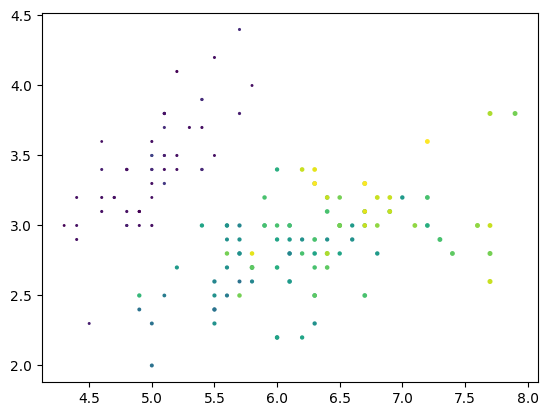

In [60]:

plt.scatter(dfIris['SepalLengthCm'], dfIris['SepalWidthCm'],dfIris['PetalLengthCm'],dfIris['PetalWidthCm'])


Data Train

In [61]:
x_train = dfIris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

Scalling

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


x_train = scaler.fit_transform(x_train)

Clustering / Fitting Model

In [63]:
from sklearn.cluster import KMeans
KMC = KMeans(n_clusters=3,n_init='auto',random_state=6)
KMC

KMeans(n_clusters=3, n_init='auto', random_state=6)

In [64]:
y_cluster = KMC.fit_predict(x_train)
y_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [65]:
dfIris['Cluster'] = y_cluster
dfIris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,0
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [66]:
KMC.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

Visualisasi

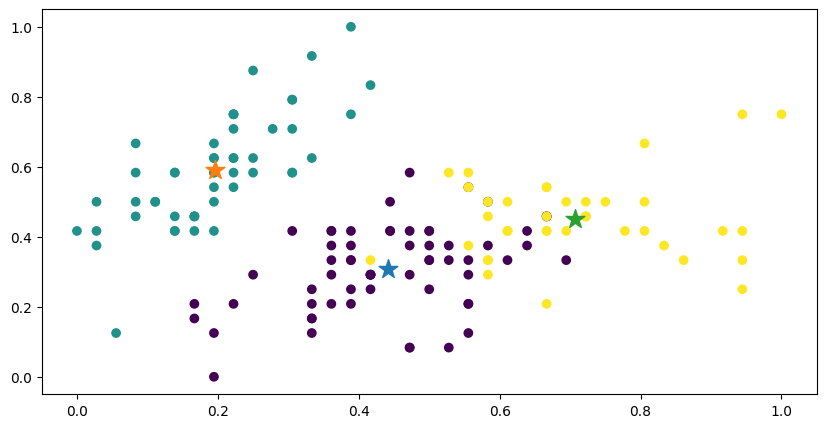

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0], x_train[:,1],c=KMC.labels_)
for i in range(0,len(KMC.cluster_centers_)):
    plt.scatter(KMC.cluster_centers_[i,0],KMC.cluster_centers_[i,1],marker='*',s=200,label='Centroid 0')
    

K terbaik

In [68]:
inersia = []
K_range = range(1,20)
for k in K_range:
    kmaen = KMeans(n_clusters=k,n_init='auto',random_state=6).fit(x_train)
    inersia.append(kmaen.inertia_)

inersia

[41.13817202297777,
 12.14368828157972,
 6.998114004826762,
 5.532831003081897,
 5.014882631056132,
 4.666147621879315,
 4.38905155134245,
 3.2943224431755134,
 2.9063468602044558,
 2.5676992722506466,
 2.4763061556821806,
 2.2297854038417273,
 2.0058876178148033,
 1.907372254160295,
 1.8471581672523403,
 1.7452315460839871,
 1.6574299119660074,
 1.5206299894624644,
 1.437941704278301]

Text(0, 0.5, 'Sum of error')

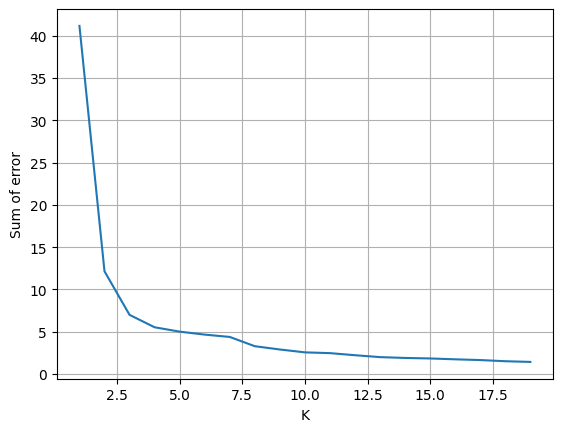

In [69]:
plt.plot(K_range,inersia)
plt.grid()
plt.xlabel('K')
plt.ylabel('Sum of error')

Data set Baru

In [70]:
dfIris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,0
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
